In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.api.models import Sequential
from keras.api.layers import Dense

In [2]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_hidden_input = np.random.rand(input_size, hidden_size)
        self.weights_hidden_out = np.random.rand(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def sigmoid_derivative(x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden_layer_values = np.dot(X, self.weights_hidden_input) +self.bias_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_values)
        self.output_layer_values = np.dot(self.hidden_layer_output,self.weights_hidden_out) + self.bias_output
        self.output_layer_out = self.sigmoid(self.output_layer_values)
        return self.output_layer_out
        
    def backward(self, X, y, predicted):
        dS_out = predicted - y
        dW_out = np.dot(self.hidden_layer_output.T, dS_out)
        db_out = np.sum(dS_out, axis=0, keepdims=True)
        dS_hidden = np.dot(dS_out, self.weights_hidden_out.T) * self.sigmoid_derivative(self.hidden_layer_output)
        dW_hidden = np.dot(X.T, dS_hidden)
        db_hidden = np.sum(dS_hidden, axis=0, keepdims=True)
        return dW_hidden, dW_out, db_hidden, db_out
    def update(self, dW_hidden, dW_out, db_hidden, db_out):
        self.weights_hidden_input -= learning_rate * dW_hidden
        self.weights_hidden_out -= learning_rate * dW_out
        self.bias_hidden -= learning_rate * db_hidden
        self.bias_output -= learning_rate * db_out
    def predict(self, X):
        return self.forward(X)

In [3]:
#%% Data preprocessing
# Input dataset (Weight, Size)
inputs = np.array([[120, 10], [180, 12], [90, 8], [110, 7.5], [150, 11], [170,13], [95, 9], [130, 10.5], [200, 14], [100, 8]])
# Labels (one-hot encoded): Eggplant = 1, Carrot = 0
outputs = np.array([[1], [1], [0], [0], [1], [1], [0], [1], [1], [0]])
#%% Normalize the inputs
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)
#%% Convert data to TensorFlow tensors
inputs_scaled = tf.convert_to_tensor(inputs_scaled, dtype=tf.float32)
outputs = tf.convert_to_tensor(outputs, dtype=tf.float32)

# Softmax

In [4]:
model = Sequential()
model.add(keras.Input(shape=(inputs_scaled.shape[1],)))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [5]:
#%% Training loop
# history = model.fit(inputs_scaled, outputs, epochs=100, verbose=1) # show detailed progress: verbose=0 / 1(default) / 2
history = model.fit(inputs_scaled, outputs, epochs=1000, batch_size=100, verbose=2)
#%% Final output after training
print("Predicted outputs after training:")
predicted_output = model.predict(inputs_scaled)
print(predicted_output)

Epoch 1/1000


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 2)

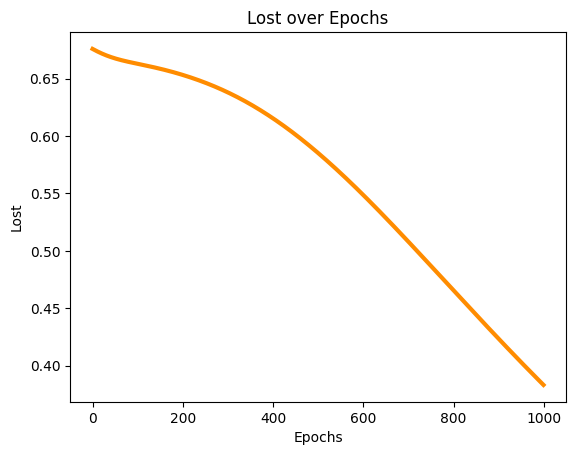

In [ ]:
#%% Plotting the cost over epochs
loss_history = history.history['loss']
plt.plot(loss_history, lw=3, color="darkorange")
plt.xlabel('Epochs')
plt.ylabel('Lost')
plt.title('Lost over Epochs')
plt.show()